## Image Gradients
pg 73-76

### Goal In this chapter, we will learn to:

• Find Image gradients, edges etc

• We will see following functions : **cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()**

### Theory
OpenCV proviede 3 types of gradient filters or High-pass filters
- Sobel
- Scharr
- Laplician

### 1. Sobel and Scharr Derivatives
Sobel operation is a joint Gausssian smoothign plus diferentioation operation, so its more resitant to noise. Uoi can specify the direction of derivative sto be take, vertical or horisontal(by the arugemtns, `y order` and `x order` respectively). Y ou can also specify the size og kernel by the argumetn `ksize`. IF `k size = - 1`, a $3x3$ Scharr filter is used whick gives better results that $3x3$ Sobel fiter.

### 2. Laplacian Derivatives

It calculates the Laplacian of the image given by the relation,
$$
\Delta src = \frac{\partial^2 src}{\partial x^2} + \frac{\partial^2 src}{\partial y^2}  
$$
where each deriative is found using Sobel derivatives. 
If ksize = 1, then following kernel is used for ﬁltering:

$$
kernel =\begin{bmatrix}
   0 & 1 & 0 \\
   1 & -4 & 1 \\
   0 & 1 & 0 
\end{bmatrix}
$$

### Code
Below code shows all operations in a single diagram. All kernels are $5x5$ size. Depth of output image is passed $-1$ to get the reusn in `np.unit8` type

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

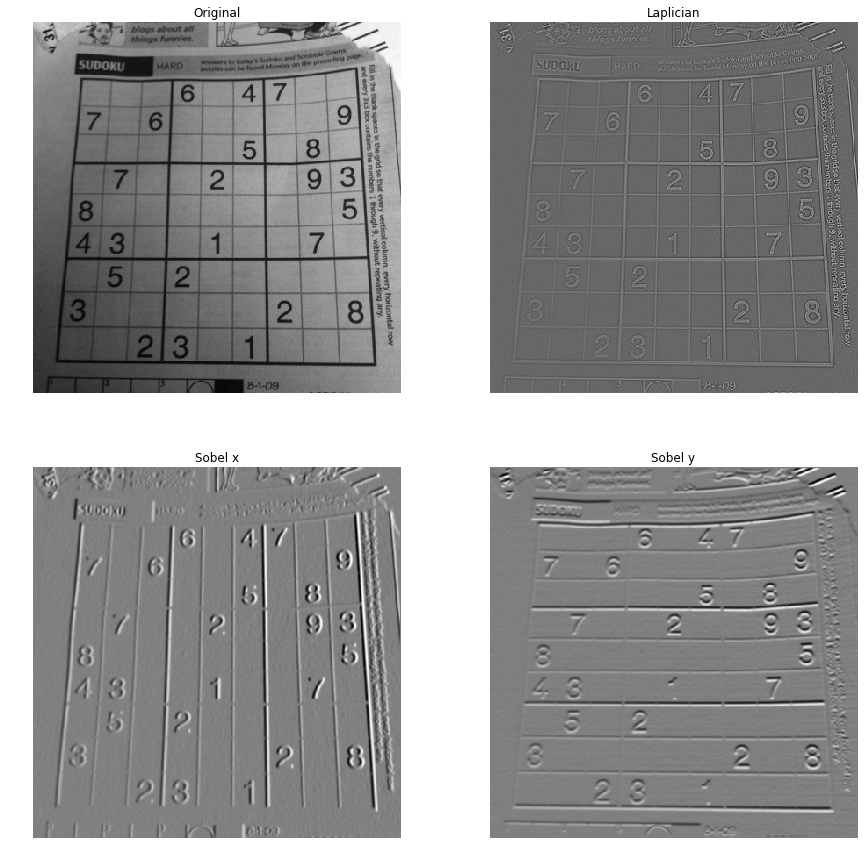

In [2]:
img = cv2.imread('images/dave.jpg',0)


laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)

# lets plot them
plt.figure(figsize=(15,15))

plt.subplot(2,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(2,2,2), plt.imshow(laplacian,cmap='gray')
plt.title('Laplician'),plt.axis("off")

plt.subplot(2,2,3), plt.imshow(sobelx,cmap='gray')
plt.title('Sobel x'),plt.axis("off")

plt.subplot(2,2,4), plt.imshow(sobely,cmap='gray')
plt.title('Sobel y'),plt.axis("off")


plt.show()

### One Important Matter!
In our last example, output datatype is `cv2.CV_8U` or `np.uint8`. But there is a slight problem with that, Black-to-white transitions taken as sositibe slope(it has a positie value) while White-to-black transition takes a negative slope( negative value). So hwne you covnert data to `np.uint8`, all negative slopes are mede zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel ﬁlter and difference in results.

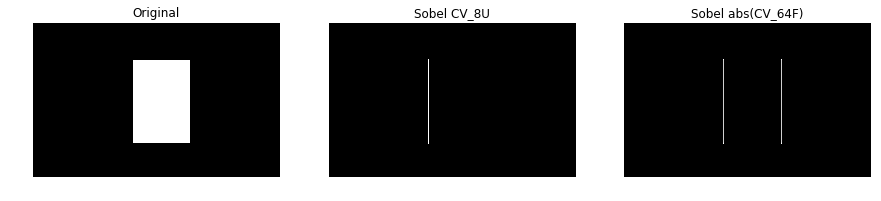

In [3]:
img = cv2.imread('images/box1.png',0)

# output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img, cv2.CV_8U,1,0,ksize=5)

# output dtype = cv2.CV_64. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)


# lets plot them
plt.figure(figsize=(15,15))

plt.subplot(1,3,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(sobelx8u,cmap='gray')
plt.title('Sobel CV_8U'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(sobel_8u,cmap='gray')
plt.title('Sobel abs(CV_64F)'),plt.axis("off")

plt.show()